C:\Users\Fomkin.AG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


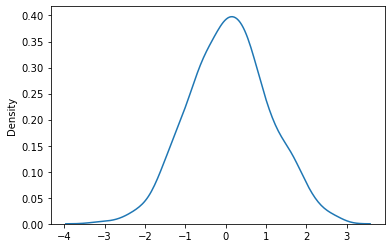

In [71]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000)
sns.distplot(random_array, hist=False)

plt.show() 

In [72]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [73]:
series

0      1.356765
1     -1.408824
2     -0.665881
3     -0.122841
4     -1.236605
         ...   
995   -0.756953
996    1.250512
997    0.743230
998   -0.816514
999    1.377596
Length: 1000, dtype: float64

# Среднее значение

In [74]:
my_mean = sum(series) / len(series)
my_mean

0.08821914759707238

In [75]:
# check
if my_mean == series.mean():
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны


# Медиана

In [76]:
ind = len(series) // 2
serlist = sorted(series)
if len(serlist) % 2 != 0:
    my_median = serlist[ind]
else:
    my_median = (serlist[ind] + serlist[ind - 1]) / 2
my_median

0.09524249460011783

In [77]:
# check
if my_median == series.median():
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны


# Стандартное отклонение

Дисперсия(`var`) - разница квадрата суммы с каждым элемента со средним<br>
Ст.откл.(`std`) - квадратный корень из `var`
<br><br>
Найдем стандатное отклонение двумя способами: *сразу в пандасе* и *на чистом питоне*.

In [78]:
my_var_pandas = (sum(series.apply(lambda x: (x - series.mean())**2)) / len(series))**0.5
my_var_pandas

0.9959510110434576

In [79]:
if my_var_pandas == np.std(series):
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны


In [81]:
my_var_pure_python = (sum((x-series.mean())**2 for x in serlist) / len(serlist))**0.5
my_var_pure_python

0.9959510110434576

In [82]:
if my_var_pure_python == np.std(series):
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны


# Межквартильный размах

In [83]:
ind_q1 = len(series) // 4
serlist = sorted(series)
if len(serlist) % 4 != 0:
    my_q1 = serlist[ind_q1]
else:
    my_q1 = (serlist[ind_q1] + serlist[ind_q1 - 1]) / 2
my_q1

-0.5997724962196334

In [84]:
q1 = series.quantile(0.25, interpolation='midpoint')
q1

-0.5997724962196334

In [85]:
ind_q3 = len(series) // 4 * 3
serlist = sorted(series)
if len(serlist) % 4 != 0:
    my_q3 = serlist[ind_q3]
else:
    my_q3 = (serlist[ind_q3] + serlist[ind_q3 - 1]) / 2
my_q3

0.7337529646951814

In [86]:
q3 = series.quantile(0.75, interpolation='midpoint')
q3

0.7337529646951814

In [87]:
my_iqr = q3 - q1
my_iqr

1.3335254609148146

In [88]:
q3, q1 = np.percentile(series, [75 ,25], interpolation='midpoint')
iqr = q3 - q1
iqr

1.3335254609148146

In [89]:
if my_iqr == iqr:
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны


# 23-й перцентиль

In [90]:
perc23 = np.percentile(series, 23, interpolation='midpoint')
perc23

-0.6484482910596828

In [91]:
ind_perc23 = round(len(series) * 0.23)
serlist = sorted(series)
if len(serlist) % 4 != 0:
    my_perc23 = serlist[ind_perc23]
else:
    my_perc23 = (serlist[ind_perc23] + serlist[ind_perc23 - 1]) / 2
my_perc23

-0.6484482910596828

In [92]:
if my_perc23 == perc23:
    print('Вычисления верны')
else:
    print('Где-то ошибка')

Вычисления верны
